In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import STIX_interactiveQL as istx
#import STIX_QL as stxql
#import RPW_interactiveQL as irpw
import STIX_RPW_lab as sololab
import datetime as dt
from astropy.time.core import Time

 # folder paths
RPW_folder= "../RPW/CDF/"
STIX_folder="../STIX/stx_files/"


#RPW indexes
# suggested  indexes : Antonio vecchio
IDX_SELECTED_FREQS=[437,441,442,448,453,458,465,470,477,482,493,499,511,519,526,533,538,545,552,559,566,576,588,592,600,612,629,649,656,673,678,696,703,716,727,734,741,750,755]
#,505 is poluted
idx_0=436
selected_indexes = np.array(IDX_SELECTED_FREQS)-idx_0



# EVENTS 17 Nov 2020
## Event 15:26

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267455248_20201117T152120-20201117T160050_030091_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf
  Type: RPW L2
  sensors:  (0,) (339736,)
  data cropped from  2020-11-17 15:21:30  to  2020-11-17 15:50:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0 3225.0 3525.0 4125.0 4525.0 5225.0 5825.0 6525.0
Time axis constrained to common time interval...
Time interval from 17-Nov-2020 15:21:56  to  17-Nov-2020 15:49:50


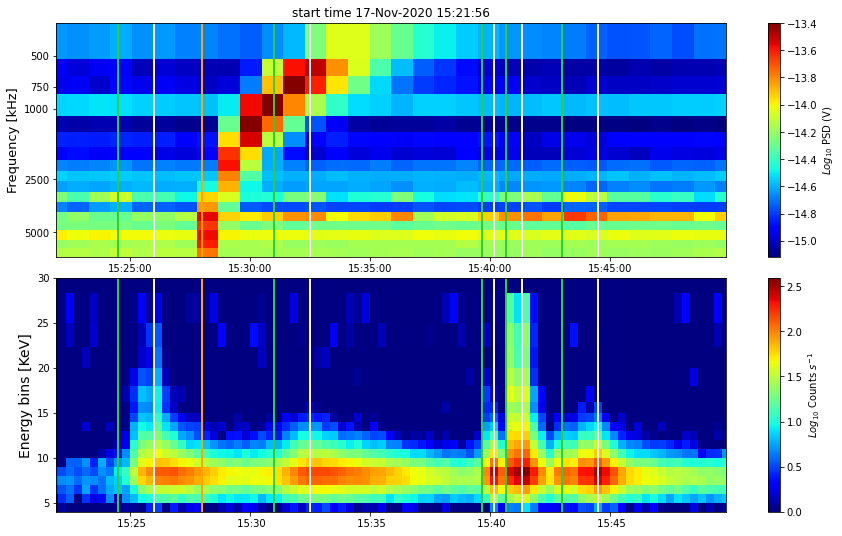

In [22]:
# 19NOV2020 0600
# STIX files
stx_L1file = "../STIX/stx_files/stx_171120/solo_L1A_stix-sci-xray-l1-1267455248_20201117T152120-20201117T160050_030091_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Nov-2020 15:21:30"
end_time = "17-Nov-2020 15:50:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,10000])
# markers of interest
markerlines = {"17-Nov-2020 15:24:30":"limegreen",
               "17-Nov-2020 15:26:00":"white",
               "17-Nov-2020 15:28:00":"orange",
               
               "17-Nov-2020 15:31:00":"limegreen",
               "17-Nov-2020 15:32:30":"white",
               
               "17-Nov-2020 15:39:40":"limegreen",
               "17-Nov-2020 15:40:10":"white",
               
               "17-Nov-2020 15:40:40":"limegreen",
               "17-Nov-2020 15:41:20":"white",
               
               "17-Nov-2020 15:43:00":"limegreen",
               "17-Nov-2020 15:44:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],
                               markers=markerlines,markerwidth=1)

## Event 18:26

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267494928_20201117T174821-20201117T184405_030115_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf
  Type: RPW L2
  sensors:  (0,) (339736,)
  data cropped from  2020-11-17 17:48:30  to  2020-11-17 18:44:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0 3225.0 3525.0 4125.0 4525.0 5225.0 5825.0 6525.0
Time axis constrained to common time interval...
Time interval from 17-Nov-2020 17:48:32  to  17-Nov-2020 18:43:24


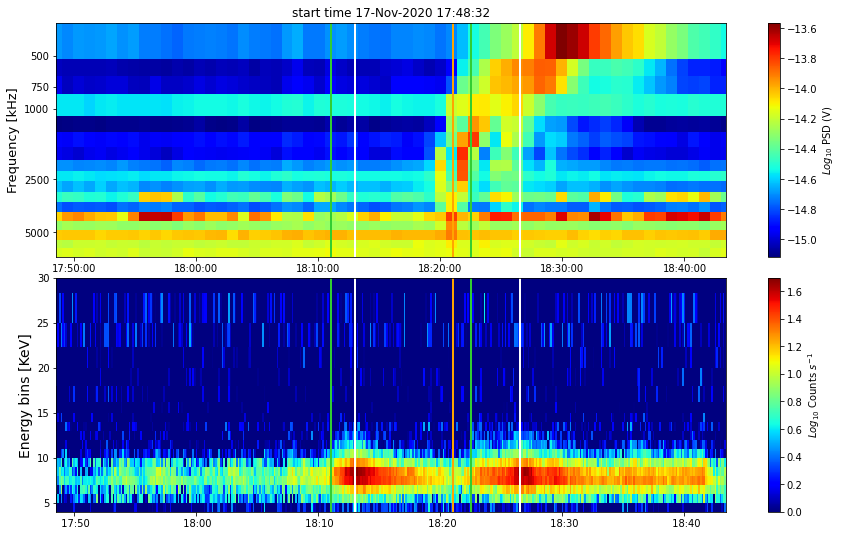

In [26]:
# 17NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_171120/solo_L1A_stix-sci-xray-l1-1267494928_20201117T174821-20201117T184405_030115_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201117_V09.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "17-Nov-2020 17:48:30"
end_time = "17-Nov-2020 18:44:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,10000])
# markers of interest
markerlines = {"17-Nov-2020 18:11:00":"limegreen",
               "17-Nov-2020 18:13:00":"white",
               "17-Nov-2020 18:21:00":"orange",
               
               "17-Nov-2020 18:22:30":"limegreen",
               "17-Nov-2020 18:26:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],
                               markers=markerlines,markerwidth=1)

# EVENTS 18 Nov 2020
## Event 10:01

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267889168_20201118T095201-20201118T110710_030105_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 09:53:00  to  2020-11-18 10:39:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0 3225.0 3525.0 4125.0 4525.0 5225.0 5825.0 6525.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 09:53:35  to  18-Nov-2020 10:38:34


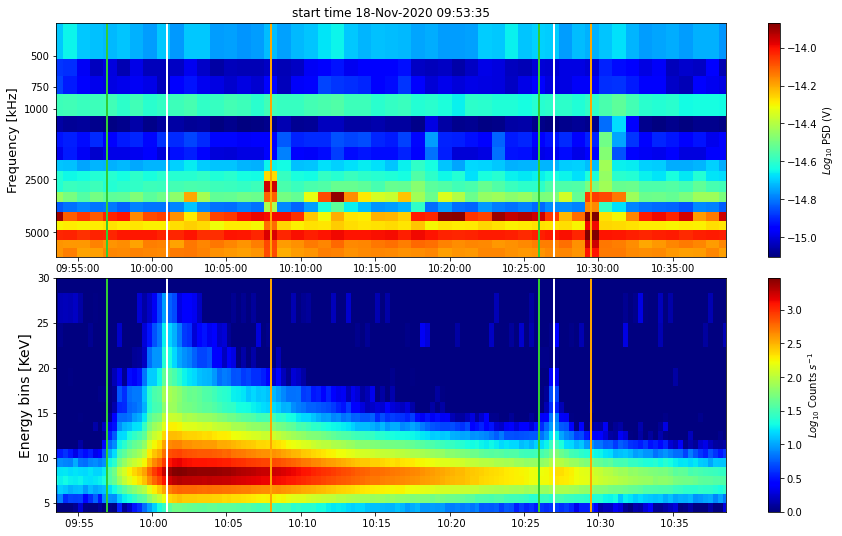

In [37]:
# 17NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_181120/solo_L1A_stix-sci-xray-l1-1267889168_20201118T095201-20201118T110710_030105_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 09:53:00"
end_time = "18-Nov-2020 10:39:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,10000])
# markers of interest
markerlines = {"18-Nov-2020 09:57:00":"limegreen",
               "18-Nov-2020 10:01:00":"white",
               "18-Nov-2020 10:08:00":"orange",
               
               "18-Nov-2020 10:26:00":"limegreen",
               "18-Nov-2020 10:27:00":"white",
               "18-Nov-2020 10:29:30":"orange",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,30],
                               markers=markerlines,markerwidth=1)

## Event 13:38

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1267936272_20201118T124401-20201118T135621_030106_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 12:44:00  to  2020-11-18 13:56:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 12:44:28  to  18-Nov-2020 13:55:31


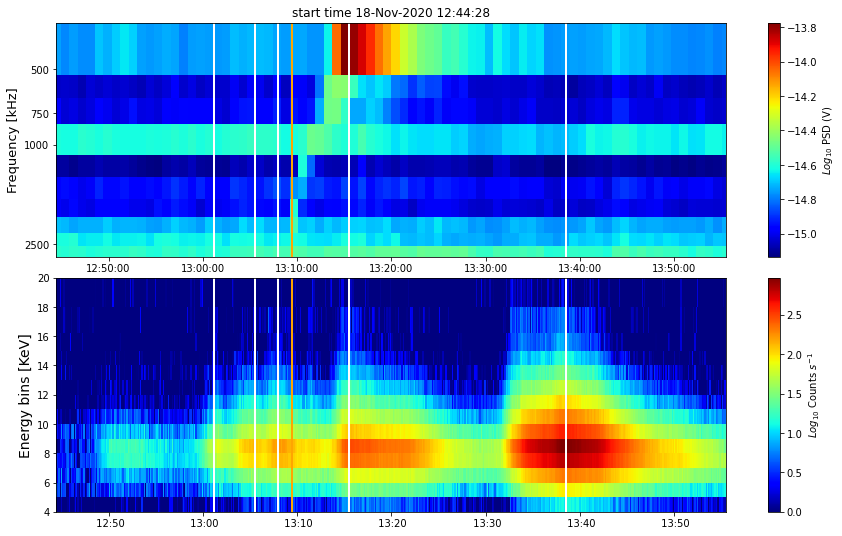

In [53]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_181120/solo_L1A_stix-sci-xray-l1-1267936272_20201118T124401-20201118T135621_030106_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 12:44:00"
end_time = "18-Nov-2020 13:56:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 13:09:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 13:01:10":"white",
               "18-Nov-2020 13:05:30":"white",
               "18-Nov-2020 13:08:00":"white",
               "18-Nov-2020 13:15:30":"white",
               "18-Nov-2020 13:38:30":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,20],
                               markers=markerlines,markerwidth=1)

## Event 16:50

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268000272_20201118T163821-20201118T171239_030119_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 16:43:00  to  2020-11-18 17:12:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 16:43:42  to  18-Nov-2020 17:11:35


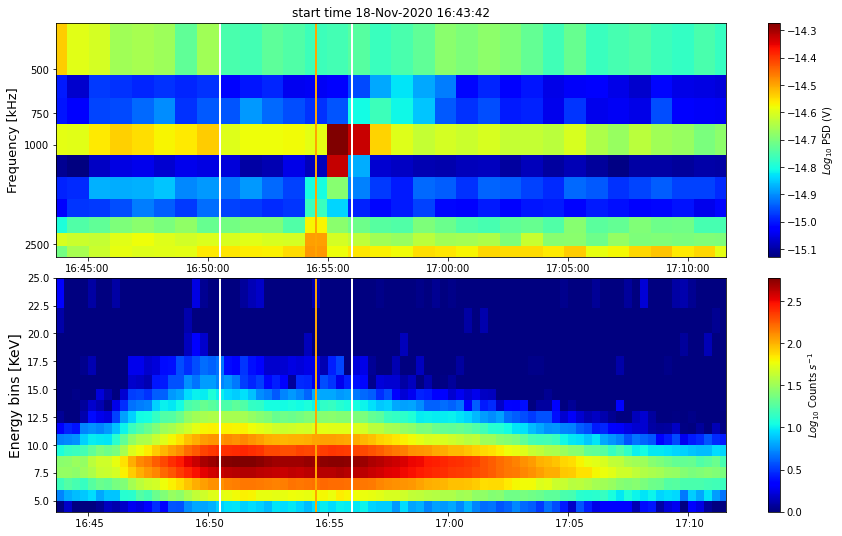

In [87]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_181120/solo_L1A_stix-sci-xray-l1-1268000272_20201118T163821-20201118T171239_030119_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 16:43:00"
end_time = "18-Nov-2020 17:12:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 16:54:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 16:50:30":"white",
               "18-Nov-2020 16:56:00":"white",

               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,25],
                               markers=markerlines,markerwidth=1)

## Event 18:02

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268017680_20201118T174241-20201118T184720_030120_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 17:19:00  to  2020-11-18 19:10:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 17:42:44  to  18-Nov-2020 18:47:16


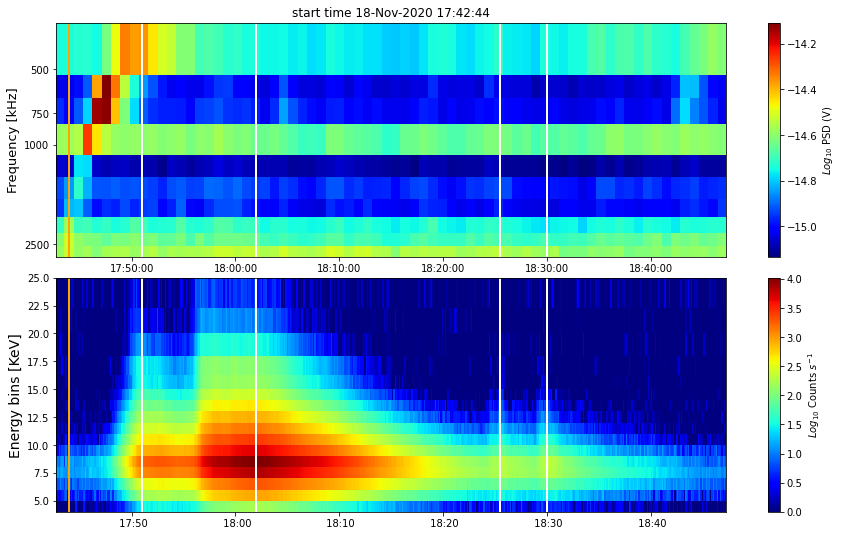

In [81]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_181120/solo_L1A_stix-sci-xray-l1-1268017680_20201118T174241-20201118T184720_030120_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 17:19:00"
end_time = "18-Nov-2020 19:10:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 17:44:00":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 17:51:00":"white",
               "18-Nov-2020 18:02:00":"white",
               "18-Nov-2020 18:25:30":"white",
               "18-Nov-2020 18:30:00":"white",
               }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,25],
                               markers=markerlines,markerwidth=1)

# Event 22:30

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268092688_20201118T221540-20201118T225850_030122_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf
  Type: RPW L2
  sensors:  (0,) (339160,)
  data cropped from  2020-11-18 22:11:00  to  2020-11-18 22:58:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 18-Nov-2020 22:15:50  to  18-Nov-2020 22:57:46


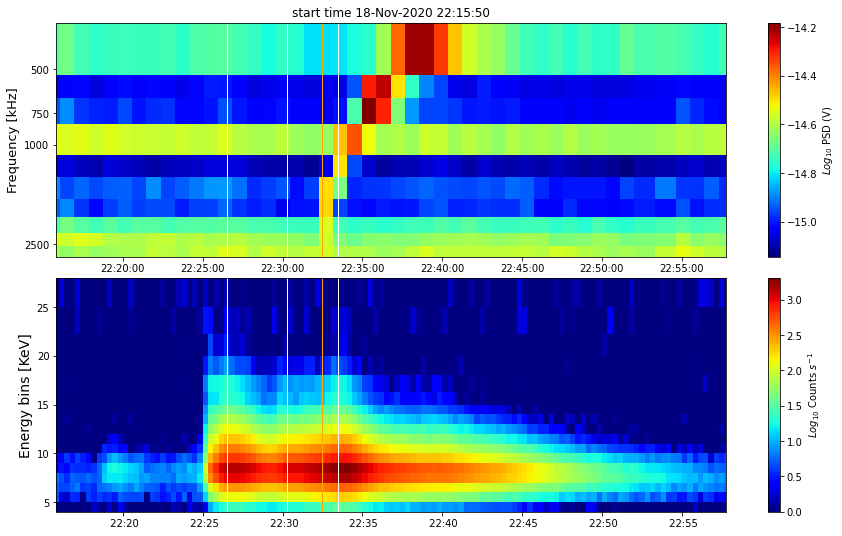

In [98]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_181120/solo_L1A_stix-sci-xray-l1-1268092688_20201118T221540-20201118T225850_030122_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201118_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "18-Nov-2020 22:11:00"
end_time = "18-Nov-2020 22:58:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "18-Nov-2020 22:32:30":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "18-Nov-2020 22:26:30":"white",
               "18-Nov-2020 22:33:30":"white",
               "18-Nov-2020 22:30:15":"white",
            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)

# EVENTS 19 Nov 2020
## Event 05:48

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268344848_20201119T054055-20201119T063555_030127_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf
  Type: RPW L2
  sensors:  (0,) (342080,)
  data cropped from  2020-11-19 05:44:00  to  2020-11-19 06:30:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 19-Nov-2020 05:44:21  to  19-Nov-2020 06:29:20


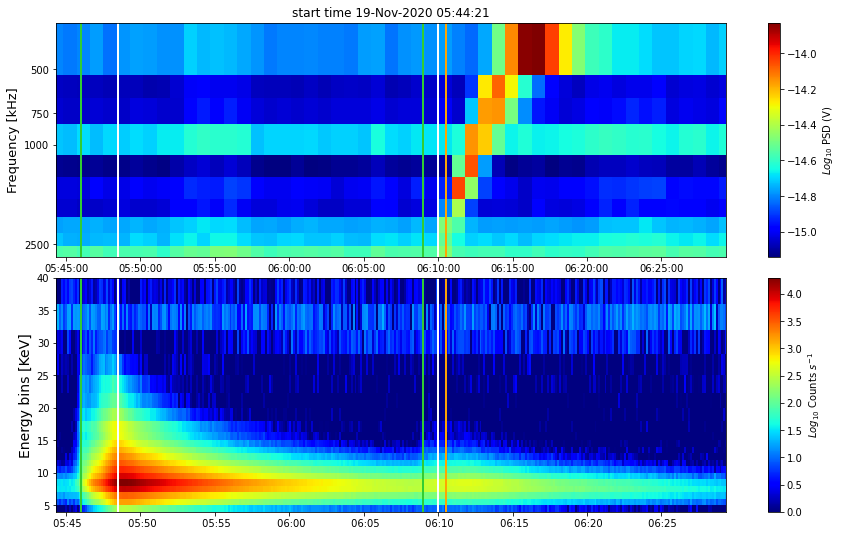

In [12]:
# 19NOV2020 0600
# STIX files
stx_L1file = "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-1268344848_20201119T054055-20201119T063555_030127_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "19-Nov-2020 05:44:00"
end_time = "19-Nov-2020 06:30:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background
l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {"19-Nov-2020 05:46:00":"limegreen",
               "19-Nov-2020 05:48:30":"white",
               
               "19-Nov-2020 06:09:00":"limegreen",
               "19-Nov-2020 06:10:00":"white",
              "19-Nov-2020 06:10:30":"orange",}
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,40],
                               markers=markerlines,markerwidth=2)

Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-1268508944_20201119T154059-20201119T163239_030144_V01.fits
  Type: STIX L1 
  Energy channels extracted:  32
Extracting info: 
  File:  solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits
  Type: STIX L1 BKG
  Energy channels extracted:  32
Extracting info:
  File:  solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf
  Type: RPW L2
  sensors:  (0,) (342080,)
  data cropped from  2020-11-19 13:40:00  to  2020-11-19 16:38:00
  Selected frequencies:  425.0 625.0 675.0 975.0 1225.0 1475.0 1825.0 2075.0 2425.0 2675.0
Time axis constrained to common time interval...
Time interval from 19-Nov-2020 15:41:14  to  19-Nov-2020 16:32:34


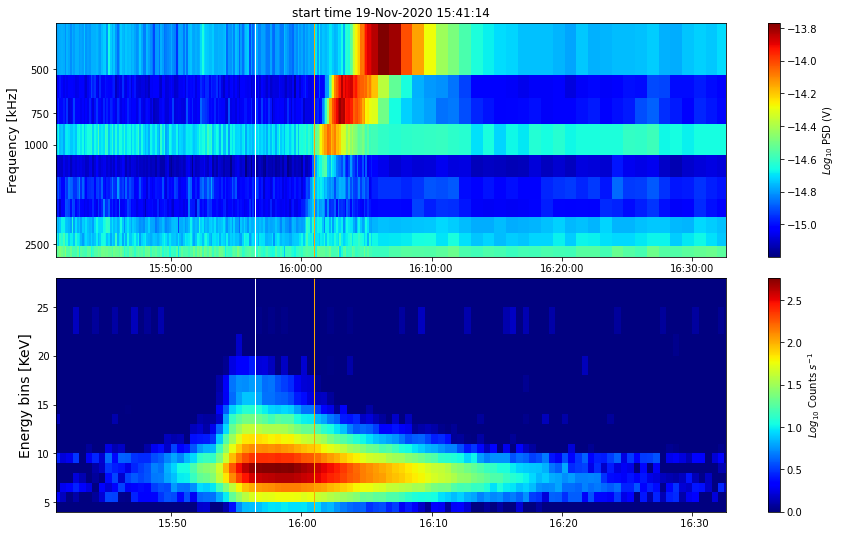

In [105]:
# 18NOV2020
# STIX files
stx_L1file = "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-1268508944_20201119T154059-20201119T163239_030144_V01.fits"
stx_BKGfile =  "../STIX/stx_files/stx_191120/solo_L1A_stix-sci-xray-l1-2011220001_20201122T200008-20201122T214017_030298_V01.fits"
#RPW files
rpw_file = "../RPW/CDF/solo_L2_rpw-hfr-surv-cdag_20201119_V08.cdf" 

# time interval
dt_fmt = "%d-%b-%Y %H:%M:%S"
#19NOV2020 0600
start_time = "19-Nov-2020 13:40:00"
end_time = "19-Nov-2020 16:38:00"

# select time range datetime
date_range=[start_time,end_time]
time_interval = [dt.datetime.strptime(x,dt_fmt) for x in date_range]

# get data objects
# get STIX counts - remove background

l1_cts = sololab.stix_remove_bkg_counts(stx_L1file,stx_BKGfile)
#l1_cts = sololab.stix_create_counts(stx_L1file)

# get RPW psd
rpw_psd = sololab.rpw_create_PSD(sololab.rpw_get_data(rpw_file),date_range=date_range,
                         proposed_indexes=selected_indexes,freq_range=[0,3000])
# markers of interest
markerlines = {#"17-Nov-2020 18:11:00":"limegreen",
#               "17-Nov-2020 18:13:00":"white",
               "19-Nov-2020 16:01:00":"orange",
               
#               "17-Nov-2020 18:22:30":"limegreen",
               "19-Nov-2020 15:56:30":"white",
               "18-Nov-2020 22:33:30":"white",
               "18-Nov-2020 22:30:15":"white",
            }
#plot
sololab.rpw_stix_combined_view(l1_cts,rpw_psd,date_range=date_range,stix_energy_range=[4,28],
                               markers=markerlines,markerwidth=1)